In [ ]:
# Dependencies

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint

In [ ]:
# API Call

fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= "b89a8705b676607c683445a983e6d21f"


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

In [ ]:
int_rate_df = pd.DataFrame(fred_response["observations"])
int_rate_df.head()

In [36]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]

int_rate_df['date'] = int_rate_df['date'].apply(pd.to_datetime)

int_rate_df = int_rate_df.astype({"value": float})

date_range = pd.period_range('1954-01', '2022-01',freq='q')
int_rate_df= pd.DataFrame({'value':np.random.rand(len(date_range))}, index=date_range)
# int_rate_df['pct_pop'] = int_rate_df['value'].pct_change()
int_rate_df['Interest Rate YoY'] = int_rate_df['value'].pct_change(12)

# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")
int_rate_df = int_rate_df.reset_index()
int_rate_df = int_rate_df.rename(columns={"index": "Quarter", "value": "Interest Rate"})
int_rate_df

,Quarter,Interest Rate,Interest Rate YoY
0,1954Q1,0.605074,NaN
1,1954Q2,0.729680,NaN
2,1954Q3,0.923901,NaN
3,1954Q4,0.886721,NaN
4,1955Q1,0.196571,NaN
...,...,...,...
268,2021Q1,0.973333,4.513932
269,2021Q2,0.348181,3.547336
270,2021Q3,0.060917,-0.904397
271,2021Q4,0.537178,-0.399813


In [11]:
# API Call for Consumer Price Index (CPI)
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'CPIAUCSL'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [12]:
cpi_df = pd.DataFrame(fred_response["observations"])
# cpi_df.head()

,realtime_start,realtime_end,date,value
0,2023-02-06,2023-02-06,1947-01-01,21.48
1,2023-02-06,2023-02-06,1947-02-01,21.62
2,2023-02-06,2023-02-06,1947-03-01,22.0
3,2023-02-06,2023-02-06,1947-04-01,22.0
4,2023-02-06,2023-02-06,1947-05-01,21.95


In [34]:
# CPI Data frame
cpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
cpi_df = cpi_df[["date", "value"]]

cpi_df['date'] = cpi_df['date'].apply(pd.to_datetime)

cpi_df = cpi_df.astype({"value": float})

date_range = pd.period_range('1954-01', '2022-01',freq='q')
cpi_df= pd.DataFrame({'value':np.random.rand(len(date_range))}, index=date_range)
# cpi_df['pct_pop'] = cpi_df['value'].pct_change()
cpi_df['Inflation Rate'] = cpi_df['value'].pct_change(12)


# Write To CSV
cpi_df.to_csv("output_data/cpi_rate.csv")

cpi_df = cpi_df.reset_index()
cpi_df = cpi_df.rename(columns={"index": "Quarter", "value": "CPI"})
cpi_df


,Quarter,CPI,Inflation Rate
0,1954Q1,0.084398,NaN
1,1954Q2,0.174718,NaN
2,1954Q3,0.732463,NaN
3,1954Q4,0.311589,NaN
4,1955Q1,0.807580,NaN
...,...,...,...
268,2021Q1,0.475215,3.290929
269,2021Q2,0.735585,0.516181
270,2021Q3,0.609561,-0.226539
271,2021Q4,0.672750,2.059551


In [37]:
# Merge Intrest Rate and CPI


mer_int_cpi_df = pd.merge(int_rate_df, cpi_df, on= 'Quarter')
mer_int_cpi_df = mer_int_cpi_df.rename(columns={"value_x": "Interest Rate", "value_y": "CPI"})



# Write to CSV
mer_int_cpi_df.to_csv("output_data/merged_int_unemp_gdp_df.csv")

#Display
mer_int_cpi_df

,Quarter,Interest Rate,Interest Rate YoY,CPI,Inflation Rate
0,1954Q1,0.605074,NaN,0.084398,NaN
1,1954Q2,0.729680,NaN,0.174718,NaN
2,1954Q3,0.923901,NaN,0.732463,NaN
3,1954Q4,0.886721,NaN,0.311589,NaN
4,1955Q1,0.196571,NaN,0.807580,NaN
...,...,...,...,...,...
268,2021Q1,0.973333,4.513932,0.475215,3.290929
269,2021Q2,0.348181,3.547336,0.735585,0.516181
270,2021Q3,0.060917,-0.904397,0.609561,-0.226539
271,2021Q4,0.537178,-0.399813,0.672750,2.059551


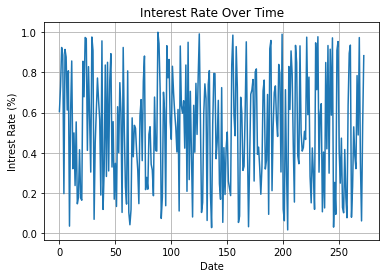

In [43]:
# x_axis = mer_int_cpi_df["Quarter"]
y_axis = mer_int_cpi_df["Interest Rate"]

plt.title("Interest Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Intrest Rate (%)")

plt.grid()

plt.savefig("output_data/Fig1.png")

plt.plot(y_axis)
plt.show()

In [ ]:
x_axis = mer_int_cpi_df["date"]
y_axis = mer_int_cpi_df["Inflation Rate"]

plt.title("Inflation Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Inflation Rate")

plt.grid()

plt.plot(x_axis, y_axis)

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

In [ ]:
x_axis = mer_int_cpi_df["date"]
y_axis = mer_int_cpi_df["Interest Rate"]
y2_axis = mer_int_cpi_df["Inflation Rate"]
y3_axis = mer_int_cpi_df["CPI"]

plt.title("Intrest Rate vs. CPI")
plt.xlabel("Date")
plt.ylabel("Intrest Rate in %, CPI in multiplier")

plt.grid()


plt.plot(x_axis, y_axis)
plt.plot(x_axis, y2_axis)
plt.plot(x_axis, y3_axis)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity
y_values = mer_int_cpi_df["CPI"]
x_values = mer_int_cpi_df["Interest Rate"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title('Intrest Rate vs Consumer price Index (CPI)')
plt.ylabel("Consumer Price Index")
plt.xlabel("Interest Rate")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()